#### 时间类型处理链接：https://blog.csdn.net/ylmx5201314/article/details/78052683

## 考勤画像分析

In [1]:
# 忽略警告信息
import warnings
warnings.filterwarnings("ignore")
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
student_info=pd.read_csv(r"D:\Entertainment\Heaven Pool\education_data\2_student_info.csv")
kaoqin=pd.read_csv(r"D:\Entertainment\Heaven Pool\education_data\3_kaoqin.csv")
kaoqintype=pd.read_csv(r"D:\Entertainment\Heaven Pool\education_data\4_kaoqintype.csv")

In [2]:
# 考勤类型
kaoqin.columns=['考勤id','学期','日期','考勤类型id','考勤名称','考勤事件id','学生id','学生姓名','班级名','班级id']
#print(kaoqin.dtypes)
print("考勤表中考勤类别：",kaoqin['考勤名称'].unique())
print("考勤表中学期数：",kaoqin['学期'].unique())
print('考勤表中考勤条数：',kaoqin.shape[0])
kaoqin.head()

考勤表中考勤类别： ['早退[移动考勤机]' '校服[移动考勤机]' '离校[移动考勤机]' '迟到[移动考勤机]' '进校[移动考勤机]' '操场考勤机'
 '迟到_晚到' '校徽_早退']
考勤表中学期数： ['2017-2018-1' '2017-2018-2' '2018-2019-1' '2016-2017-1' '2016-2017-2'
 '2013-2014-1' '2013-2014-2' nan '2014-2015-2' '2015-2016-1' '2014-2015-1'
 '2015-2016-2']
考勤表中考勤条数： 23630


,考勤id,学期,日期,考勤类型id,考勤名称,考勤事件id,学生id,学生姓名,班级名,班级id
0,134324,2017-2018-1,2018/1/27 12:21,99003,早退[移动考勤机],9900300,13893,陈某某,高三(11),872
1,134346,2017-2018-1,2018/1/27 12:41,99003,早退[移动考勤机],9900300,13667,宋某某,高三(11),872
2,134367,2017-2018-1,2018/1/27 14:13,99003,早退[移动考勤机],9900300,13925,李某某,高三(09),879
3,134263,2017-2018-1,2018/1/27 11:18,99003,早退[移动考勤机],9900300,13774,张某某,高三(09),879
4,134480,2017-2018-1,2018/1/27 14:42,99002,校服[移动考勤机],9900200,13774,张某某,高三(09),879


In [3]:
# 考勤类型表
kaoqintype.columns=['考勤类型id','考勤名称','考勤事件id','考勤事件名']
#print(kaoqintype.shape[0])
kaoqintype['考勤事件名'][kaoqintype['考勤事件名'].str.contains('默认')]=kaoqintype['考勤名称']
kaoqintype.head(15)

,考勤类型id,考勤名称,考勤事件id,考勤事件名
0,1001,迟到_晚到,100000,迟到_晚到
1,1001,迟到_晚到,100100,早上迟到
2,1001,迟到_晚到,100200,晚到学校
3,1001,迟到_晚到,100300,晚自修迟到
4,1002,校徽_早退,200000,校徽_早退
5,1002,校徽_早退,200100,校徽校服
6,1002,校徽_早退,200200,请假离校
7,1003,操场考勤机,300000,操场考勤机
8,1003,操场考勤机,300100,住宿早晨锻炼
9,1003,操场考勤机,300200,课间操请假


### 1.1 不同考勤类型id的考勤类型比例

In [4]:
# 拆分990
new=kaoqintype.ix[kaoqintype['考勤名称'].str.contains('移动考勤机')]
new['考勤简称']=new['考勤名称']
new['考勤简称'][new['考勤名称'].str.contains('早退')]=u'早退'
new['考勤简称'][new['考勤名称'].str.contains('迟到')]=u'迟到'
new['考勤简称'][new['考勤简称'].str.contains('离校')]=u'离校'
new['考勤简称'][new['考勤简称'].str.contains('进校')]=u'进校'
new['考勤简称'][new['考勤简称'].str.contains('校服')]=u'没穿校服'
print(new.head())

# 拆分100
old=kaoqintype.ix[-kaoqintype['考勤名称'].str.contains('移动考勤机')]
old['考勤简称']=old['考勤名称']
old['考勤简称'][old['考勤名称'].str.contains('迟到')]=u'迟到'
old['考勤简称'][old['考勤名称'].str.contains('早退')]=u'早退'
old['考勤简称'][old['考勤事件名'].str.contains('请假')]=u'请假'
old['考勤简称'][old['考勤事件名'].str.contains('锻炼')]=u'请假'
print(old.head(10))

    考勤类型id       考勤名称   考勤事件id      考勤事件名  考勤简称
10   99001  迟到[移动考勤机]  9900100  迟到[移动考勤机]    迟到
11   99002  校服[移动考勤机]  9900200  校服[移动考勤机]  没穿校服
12   99003  早退[移动考勤机]  9900300  早退[移动考勤机]    早退
13   99004  离校[移动考勤机]  9900400       离校考勤    离校
14   99005  进校[移动考勤机]  9900500       进校考勤    进校
   考勤类型id   考勤名称  考勤事件id   考勤事件名   考勤简称
0    1001  迟到_晚到  100000   迟到_晚到     迟到
1    1001  迟到_晚到  100100    早上迟到     迟到
2    1001  迟到_晚到  100200    晚到学校     迟到
3    1001  迟到_晚到  100300   晚自修迟到     迟到
4    1002  校徽_早退  200000   校徽_早退     早退
5    1002  校徽_早退  200100    校徽校服     早退
6    1002  校徽_早退  200200    请假离校     请假
7    1003  操场考勤机  300000   操场考勤机  操场考勤机
8    1003  操场考勤机  300100  住宿早晨锻炼     请假
9    1003  操场考勤机  300200   课间操请假     请假


In [5]:
# 合并考勤信息表和考勤类型表
info1=pd.merge(kaoqin,new,on=['考勤事件id','考勤类型id','考勤名称'])
print("new考勤表中学期数：",info1['学期'].unique())

info2=pd.merge(kaoqin,old,on=['考勤事件id','考勤类型id','考勤名称'])
print("old考勤表中学期数：",info2['学期'].unique())
#print(info1.shape[0])
#print(info2.shape[0])
#print(info1.head())
#print(info2.head())

new考勤表中学期数： ['2017-2018-1' '2017-2018-2' '2016-2017-1' '2016-2017-2' '2015-2016-1'
 '2014-2015-2' '2015-2016-2' '2018-2019-1']
old考勤表中学期数： ['2013-2014-1' '2013-2014-2' nan '2014-2015-2' '2015-2016-1' '2014-2015-1'
 '2015-2016-2']


#### 操场考勤机是在2013-2014-1/2；迟到/校服移动考勤机是在2014-2015-2,2015-2019-1/2；迟到：2013-2016-1/2；校徽早退：2013-2016-1/2；早退移动:2014-2015-2,2015-2018-1/2;离校/进校移动：2017-2018-2；2018-2019-1；

#### 1.1.1  比例

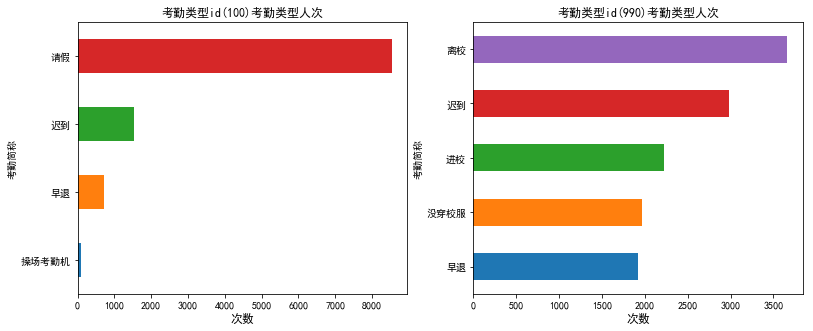

In [6]:
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['SimHei'] # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题
fig=plt.figure(figsize=(13,5))
fig.set(alpha=1)

#设置图例并且设置图例的字体及大小
font1={'weight' : 'normal','size': 12}
font2={'weight' : 'normal','size': 12}

# 考勤类型id100考勤类型人次
plt.subplot(1,2,1)
fig2=info2.groupby(["考勤简称"])['学生id'].count()
fig2=fig2.sort_values()
fig2.plot(kind='barh',fontsize=10)
plt.xlabel('次数',font2)
plt.title('考勤类型id(100)考勤类型人次',font1)


# 移动考勤机考勤类型人次
plt.subplot(1,2,2)
fig1=info1.groupby(["考勤简称"])['学生id'].count()
fig1=fig1.sort_values()
fig1.plot(kind='barh',fontsize=10)
plt.xlabel('次数',font2)
plt.title('考勤类型id(990)考勤类型人次',font1)
plt.show()

下面是Windows的字体对应名称，Follow your heart, 各种换！
黑体	SimHei
微软雅黑	Microsoft YaHei
微软正黑体	Microsoft JhengHei
新宋体	NSimSun
新细明体	PMingLiU
细明体	MingLiU
标楷体	DFKai-SB
仿宋	FangSong
楷体	KaiTi
仿宋_GB2312	FangSong_GB2312
楷体_GB2312	KaiTi_GB2312

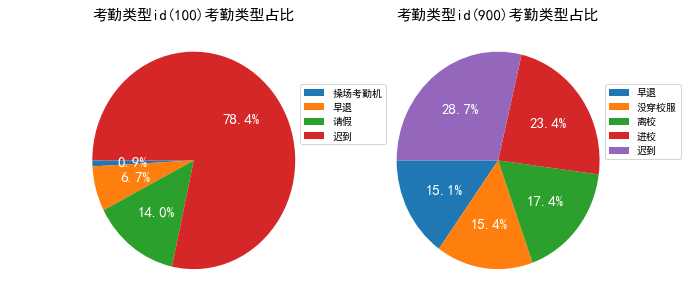

In [7]:
from pylab import mpl
font = {'family':'SimHei','weight' : 'normal','size': 15}  #设置使用的字体（需要显示中文的时候使用）
mpl.rcParams['font.sans-serif'] = ['SimHei'] # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题

fig=plt.figure(figsize=(10,5))
#fig.set(alpha=0.5)

# 考勤类型id（100）考勤类型占比
plt.subplot(1,2,1)
fig3=info2.groupby(["考勤简称"])['学生id'].count()
labels=fig3.index
values=sorted(fig3.values)
#colors=['dimgray','r','g','b','olive','peru','teal','moccasin','lightgreen']
plt.title('考勤类型id(100)考勤类型占比',font)
plt.pie(values,labels=labels,autopct='%1.1f%%',startangle=180,textprops={'fontsize': 15, 'color': 'w'})
plt.legend(bbox_to_anchor=(0.9, 0.8))


# 考勤类型id(900)考勤类型占比
plt.subplot(1,2,2)
fig4=info1.groupby(["考勤简称"])['学生id'].count()
labels=fig4.index
values=sorted(fig4.values)
#colors=['dimgray','r','g','b','olive','peru','teal','moccasin','lightgreen']
plt.title('考勤类型id(900)考勤类型占比',font)
plt.pie(values,labels=labels,autopct='%1.1f%%',startangle=180,textprops={'fontsize': 15, 'color': 'w'})
plt.legend(bbox_to_anchor=(0.9, 0.8))
plt.show()

#### 1.1.2  当前学期中考勤类型占比

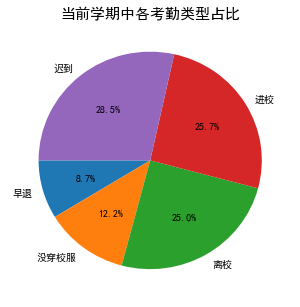

In [8]:
dangqian=info1.ix[kaoqin['学期']=='2018-2019-1']
plt.figure(figsize=(5,5))
fig.set(alpha=0.5)
dangqian=dangqian.groupby(["考勤简称"])['学生id'].count()
labels=dangqian.index
#labels.split(2)
values=sorted(dangqian.values)
plt.title('当前学期中各考勤类型占比',font)
plt.pie(values,labels=labels,shadow=False,autopct='%1.1f%%',startangle=180,textprops={'fontsize': 10, 'color': 'black'})
# textprops 设置文本标签的属性值,并且设置为白色
#关键就是在于这里：添加一个图例
# plt.legend(bbox_to_anchor=(1.0, 0.9))
plt.show()

### 1.2  不同学期考勤类型分布

<Figure size 432x432 with 0 Axes>

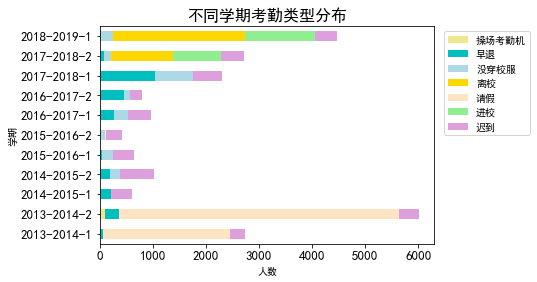

In [17]:
info=pd.concat([info1,info2])
plt.figure(figsize=(6,6))
fig.set(alpha=0.5)
fenzu=info.groupby(['学期','考勤简称'])['学生id'].count().unstack()
colors=['khaki','c','lightblue','gold','bisque','lightgreen','plum']
fenzu.plot(kind='barh',colors=colors,stacked=True,fontsize=13)
plt.xticks(rotation=0)
plt.title('不同学期考勤类型分布',fontsize=16)
plt.xlabel('人数',fontsize=10)
plt.legend(bbox_to_anchor=(1.3, 1))
plt.savefig('D:\Entertainment\Heaven Pool\不同学期考勤类型人数分布.png') #指定分辨率保存
plt.show()

In [14]:
from pyecharts import Bar
caochang=fenzu.iloc[:,0].values
zaotui=fenzu.iloc[:,1].values
yifu=fenzu.iloc[:,2].values
lixiao=fenzu.iloc[:,3].values
qinjia=fenzu.iloc[:,4].values
jinxiao=fenzu.iloc[:,5].values
chidao=fenzu.iloc[:,6].values
index=fenzu.index
bar=Bar('不同学期考勤类型人数分布')
bar.add('操场考勤机',index,caochang)
bar.add('早退',index,zaotui)
bar.add('没穿校服',index,yifu)
bar.add('离校',index,lixiao)
bar.add('请假',index,qinjia)
bar.add('进校',index,jinxiao)
bar.add('迟到',index,chidao,legend_pos ='right',legend_top ='top',xaxis_name='学期',xaxis_name_pos='start',xaxis_rotate=40,is_more_utils  =True)
bar.render(path=r'D:\Entertainment\Heaven Pool\不同学期考勤类型人数分布.html')
bar

### 1.3  考勤类型时长